In [1]:
import pandas as pd
from relative_path import OUTPUT_TRANSFORM, OUTPUT_MAIN

from pandas import DataFrame, Series
from typing import List, Dict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from visualization import VisualizeRelational
from exploration_data import EvaluateDataset

In [2]:
%matplotlib inline

## Standard

In [3]:
TRACK_DATA_PROCESSED = OUTPUT_TRANSFORM / "processed_track.parquet"

In [4]:
df_tracks =     pd.read_parquet(TRACK_DATA_PROCESSED)

In [5]:
df_tracks.sort_values(by="track_popularity", ascending=False, inplace=True)
df_tracks.reset_index(drop=True, inplace=True)

In [6]:
df_tracks

,track_id,track_name,track_popularity,duration_ms,artist_name,artist_id,year,artist_total_followers,artist_mean_popularity
0,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020,31308207,96
1,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020,1698014,88
2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020,31308207,96
3,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020,5527032,87
4,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020,946550,91
...,...,...,...,...,...,...,...,...,...
518063,5VusgIcScG39vX5nXvAHEc,Johann Jacob Froberger: Giga,1,95867,"['Johann Jakob Froberger', 'Andrés Segovia']","['2oGCBnMefFtcVXsId7LRKe', '3Din7QXYnTjT52WF62...",1944,57843,37
518064,5W3mccnQwF5YWUveNrUAx2,Sawan Ke Badalo,1,207987,"['Zohrabai Ambalawali', 'Karan Dewan']","['4IbxoDWYegersIEUCd9OcY', '0MUlBvqZ5n5nzOTBRK...",1944,8424,3
518065,6UFFqeVLZZ6OnzvzbrTvM1,I'm Confessin' (That I Love You) (11-06-44),1,203627,['Ella Fitzgerald'],['5V0MlUE1Bft0mbLlND7FJz'],1944,1931266,73
518066,7aNRZbRNOOolWOc7EsPR2S,Krishna Mugundha,1,196027,['M. K. Thyagaraja Bhagavathar'],['64LJVsjBP6bkbacv9SmepY'],1944,1204,9


## Standard Analysis

In [7]:
eval_tracks = EvaluateDataset(df_tracks, "Tracks", export_plot=True, output_path=OUTPUT_MAIN)

In [8]:
eval_tracks.dataframe.columns

Index(['track_id', 'track_name', 'track_popularity', 'duration_ms',
       'artist_name', 'artist_id', 'year', 'artist_total_followers',
       'artist_mean_popularity'],
      dtype='object')

In [9]:
#eval_tracks.get_profiling()

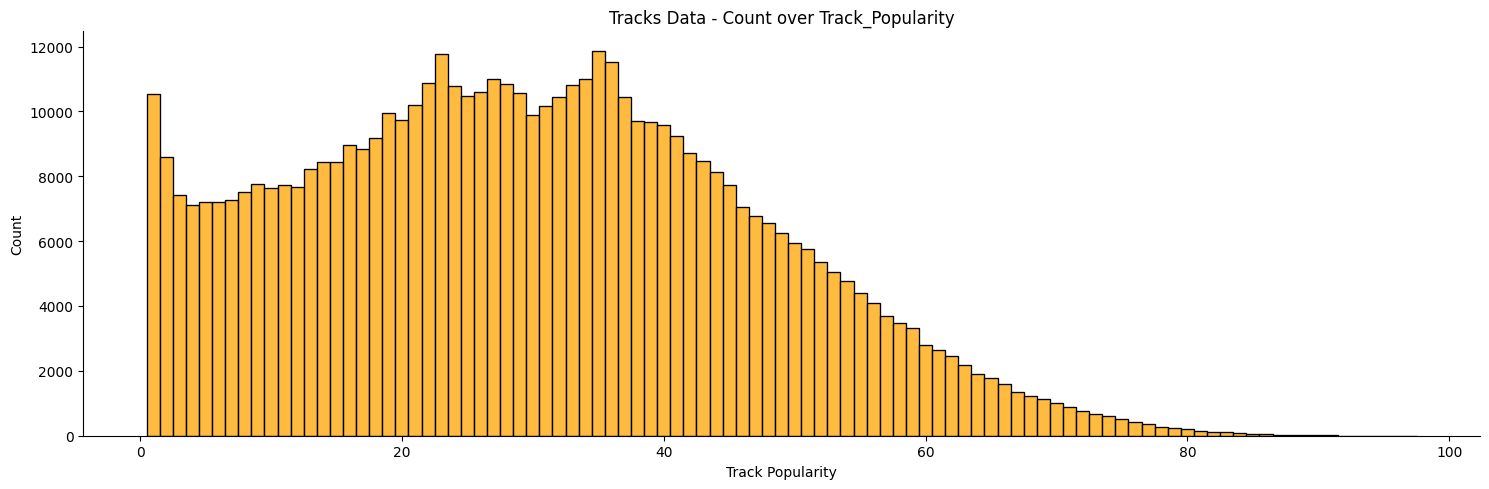

In [10]:
eval_tracks.get_category_hist("track_popularity", show=True)

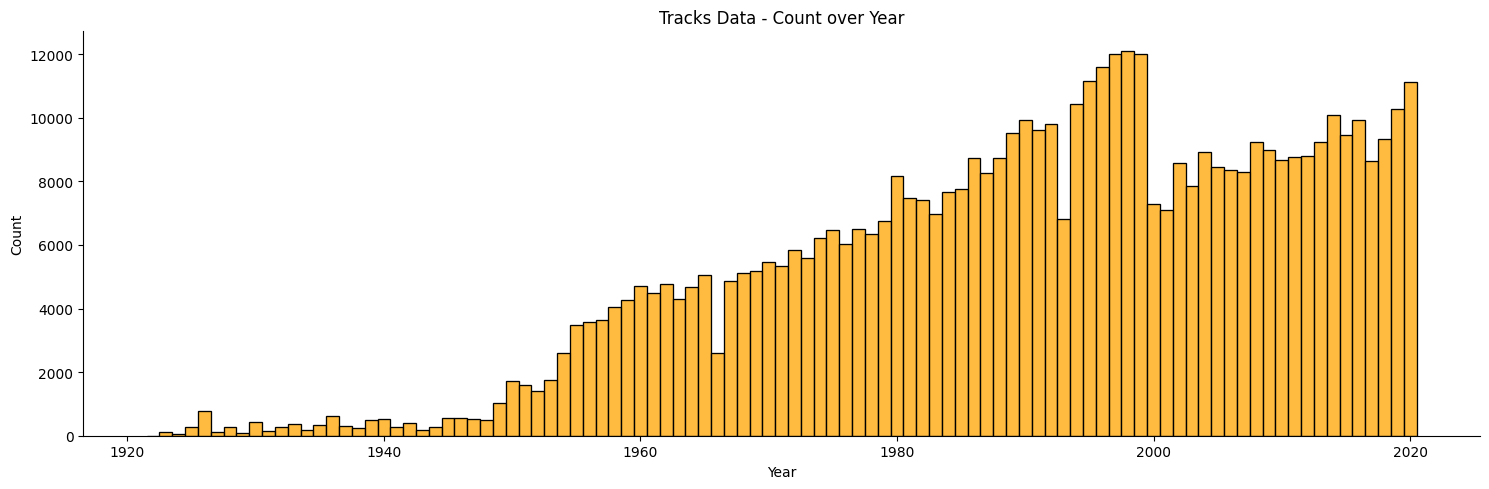

In [11]:
eval_tracks.get_category_hist("year", show=True)

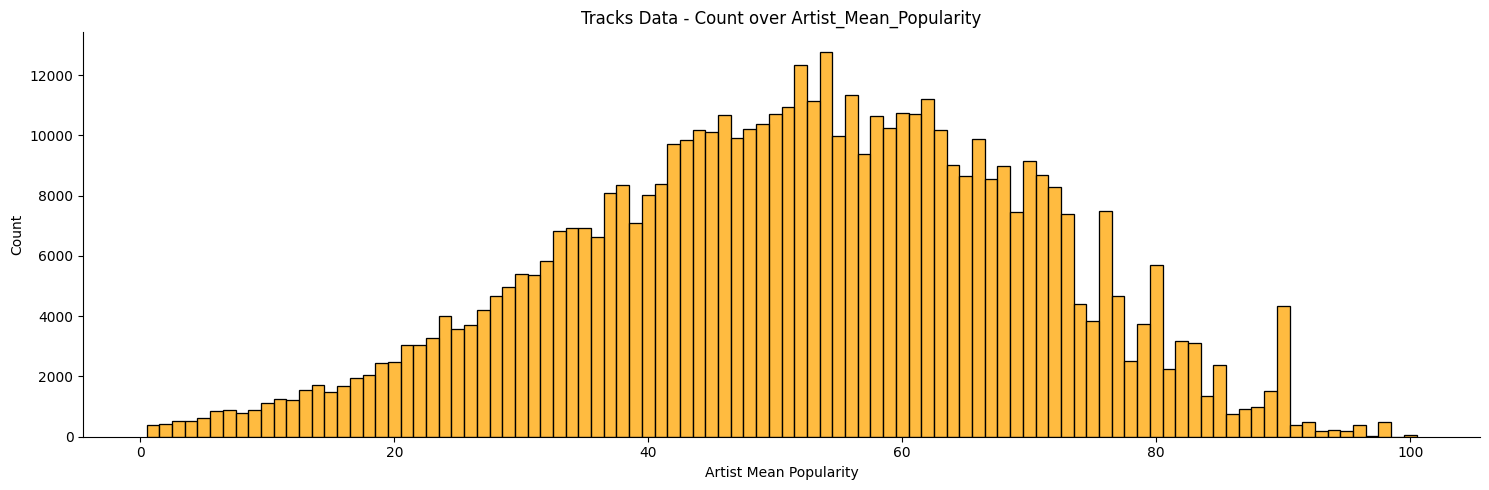

In [12]:
eval_tracks.get_category_hist("artist_mean_popularity", show=True)

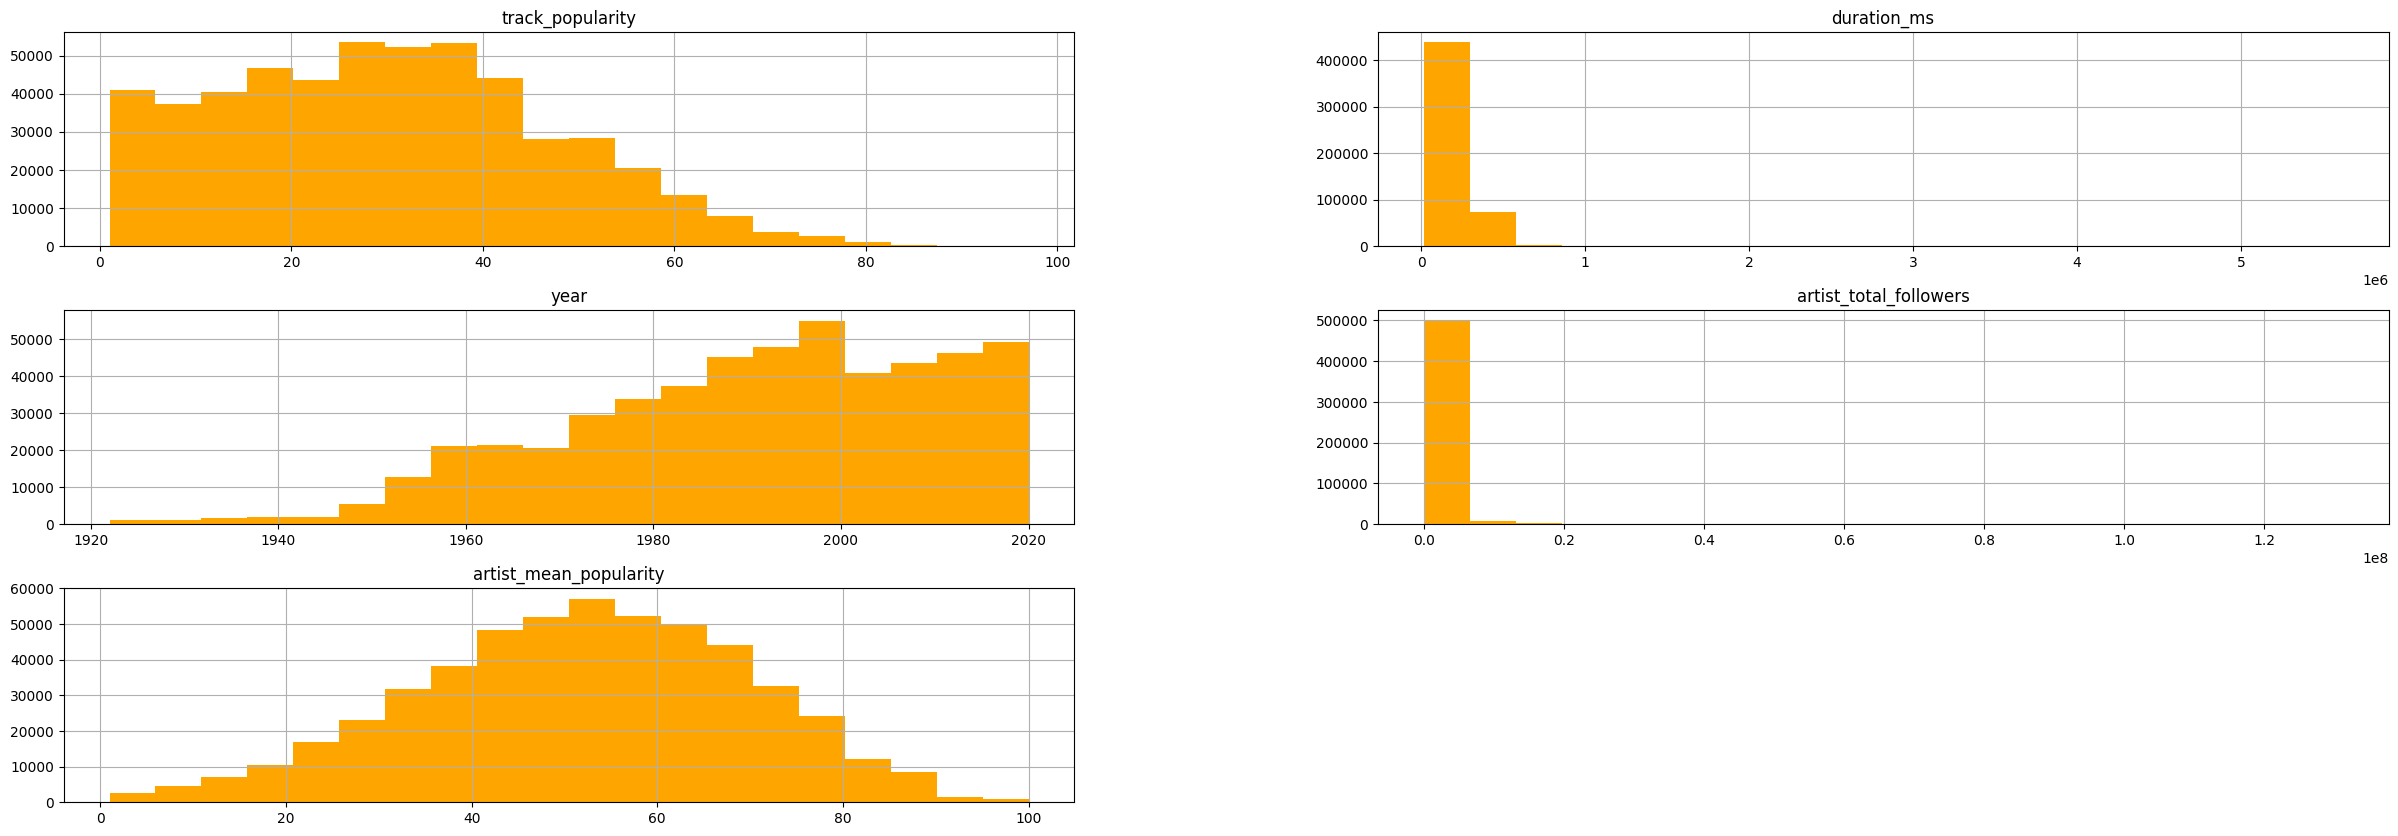

In [13]:
eval_tracks.get_all_hist(show=True)

## Relational Analysis: Box Plot, Scatter Plot, Line Plot (Checking the Dataset)

### 1 - Track_popularity over Year

In [14]:
# 
relational_tracks = VisualizeRelational(input_df=df_tracks, name="Tracks", x="year", y="track_popularity", export_plot=True, show_plot=False)

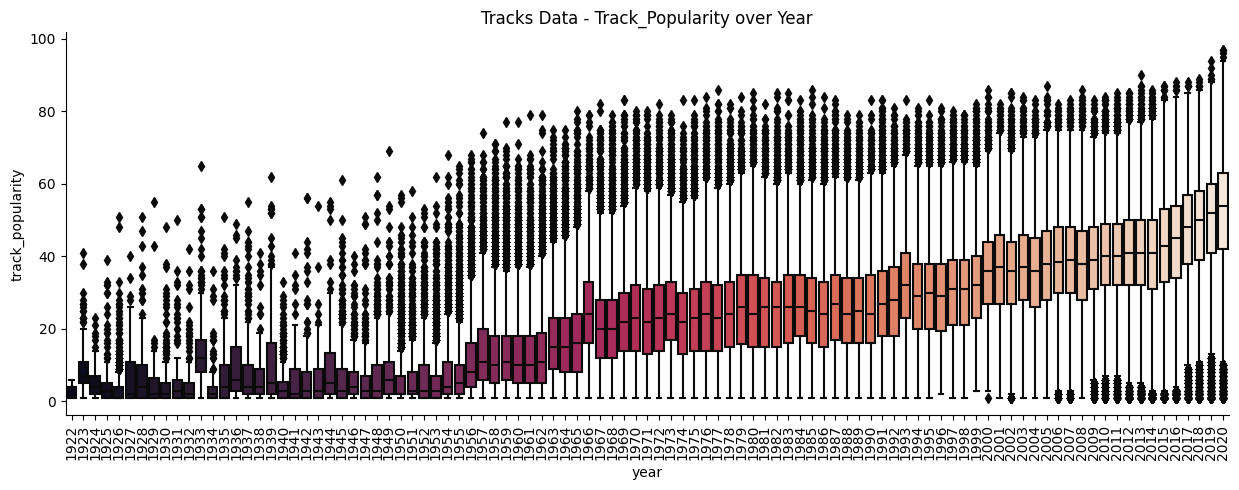

In [15]:
relational_tracks.BoxPlot(show=True)

/Users/mavwong/Desktop/Github/SpotifyDataAnalysis/visualization.py:124: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



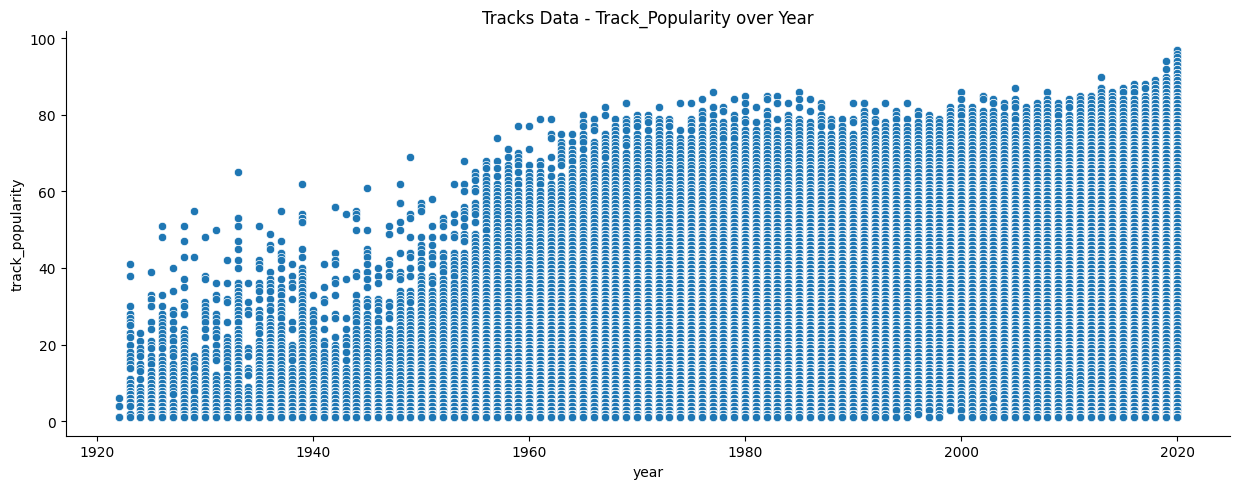

In [16]:
relational_tracks.ScatterPlot(show=True)

/Users/mavwong/Desktop/Github/SpotifyDataAnalysis/visualization.py:103: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




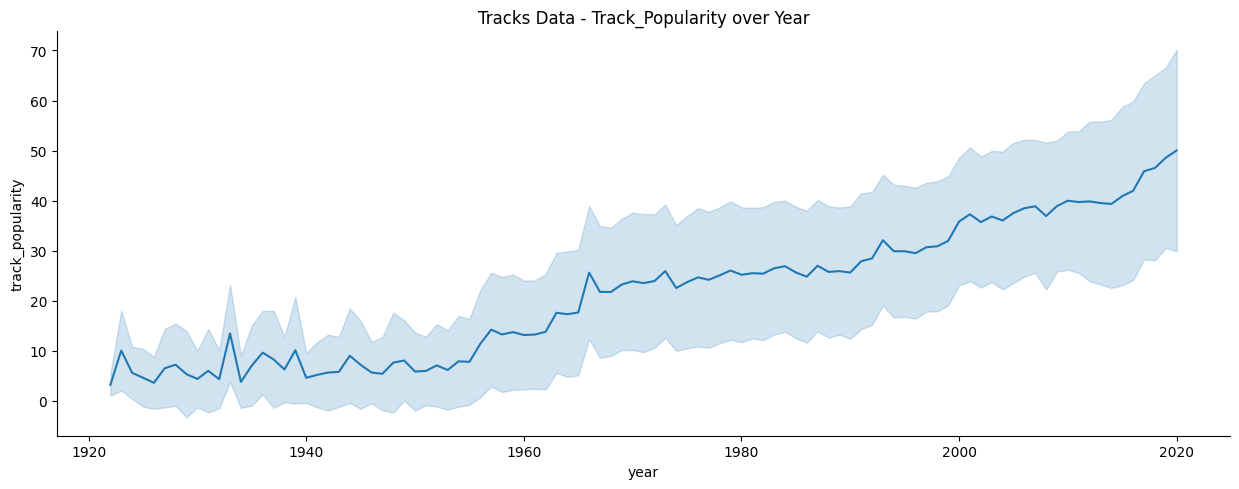

In [17]:
relational_tracks.LinePlot(show=True)

### 2 - Track_popularity over Artist Total Followers

In [18]:
popularity_over_popularity = VisualizeRelational(input_df=df_tracks, name="Tracks", x="track_popularity", y="artist_mean_popularity", export_plot=True, show_plot=True)

/Users/mavwong/Desktop/Github/SpotifyDataAnalysis/visualization.py:103: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




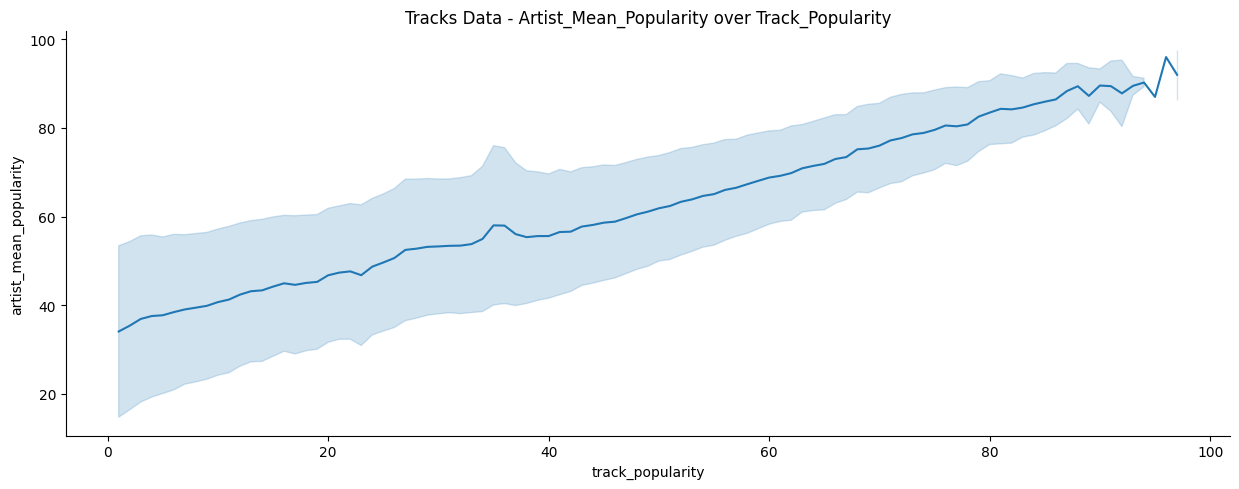

In [19]:
popularity_over_popularity.LinePlot()

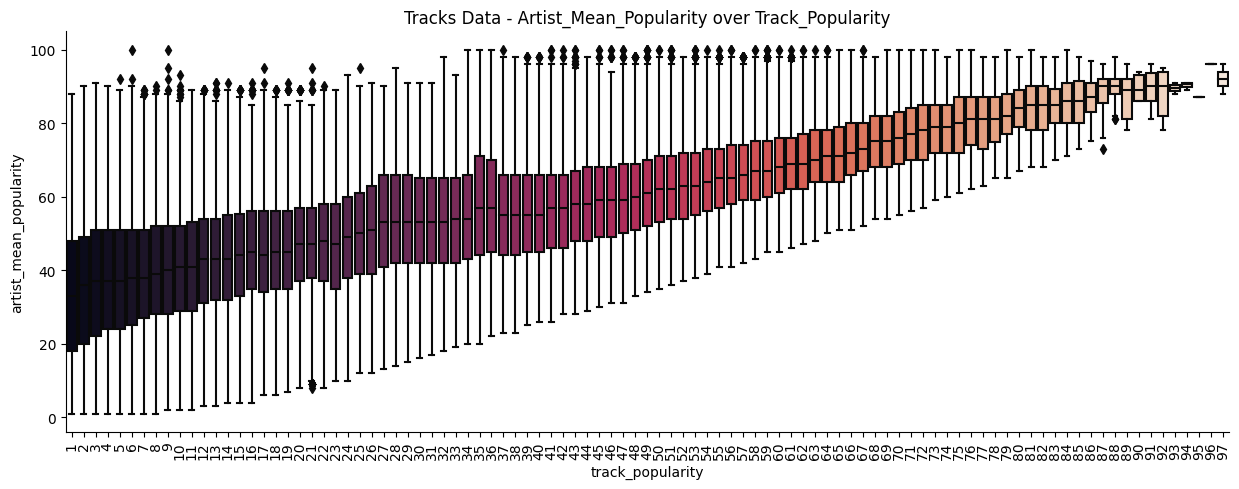

In [20]:
popularity_over_popularity.BoxPlot()

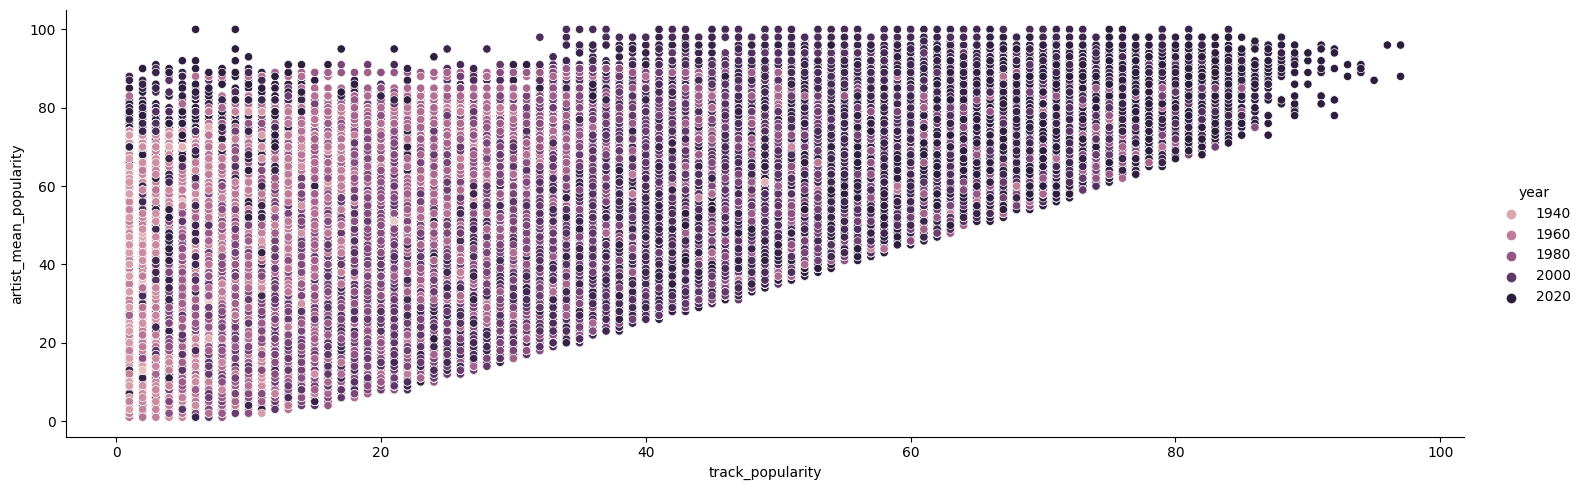

In [29]:
fig = sns.relplot(data=df_tracks, x="track_popularity", y="artist_mean_popularity", hue="year", aspect=3)
fig.tight_layout()
plt.savefig("Popularity_with_year")
plt.show()